# Advanced Certification in AIML
## A Program by IIIT-H and TalentSprint
### Python at Work

### Setup Steps

In [0]:
#@title Please enter your registration id to start: (e.g. P181900101) { run: "auto", display-mode: "form" }
Id = "P181902118" #@param {type:"string"}


In [0]:
#@title Please enter your password (normally your phone number) to continue: { run: "auto", display-mode: "form" }
password = "8860303743" #@param {type:"string"}


In [0]:
#@title Run this cell to complete the setup for this Notebook
from IPython import get_ipython

ipython = get_ipython()
  
notebook="BLR_M0W0_Python_Lines" #name of the notebook
Answer = "Ungraded"
def setup():
#  ipython.magic("sx pip3 install torch")  
    from IPython.display import HTML, display
    display(HTML('<script src="https://dashboard.talentsprint.com/aiml/record_ip.html?traineeId={0}&recordId={1}"></script>'.format(getId(),submission_id)))
    print("Setup completed successfully")
    return

def submit_notebook():
    
    ipython.magic("notebook -e "+ notebook + ".ipynb")
    
    import requests, json, base64, datetime

    url = "https://dashboard.talentsprint.com/xp/app/save_notebook_attempts"
    if not submission_id:
      data = {"id" : getId(), "notebook" : notebook, "mobile" : getPassword()}
      r = requests.post(url, data = data)
      r = json.loads(r.text)

      if r["status"] == "Success":
          return r["record_id"]
      elif "err" in r:        
        print(r["err"])
        return None        
      else:
        print ("Something is wrong, the notebook will not be submitted for grading")
        return None

    elif getAnswer() and getComplexity() and getAdditional() and getConcepts():
      f = open(notebook + ".ipynb", "rb")
      file_hash = base64.b64encode(f.read())

      data = {"complexity" : Complexity, "additional" :Additional, 
              "concepts" : Concepts, "record_id" : submission_id, 
              "answer" : Answer, "id" : Id, "file_hash" : file_hash,
              "notebook" : notebook}

      r = requests.post(url, data = data)
      r = json.loads(r.text)
      print("Your submission is successful.")
      print("Ref Id:", submission_id)
      print("Date of submission: ", r["date"])
      print("Time of submission: ", r["time"])
      print("View your submissions: https://iiith-aiml.talentsprint.com/notebook_submissions")
      print("For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.")
      return submission_id
    else: submission_id
    

def getAdditional():
  try:
    if Additional: return Additional      
    else: raise NameError('')
  except NameError:
    print ("Please answer Additional Question")
    return None

def getComplexity():
  try:
    return Complexity
  except NameError:
    print ("Please answer Complexity Question")
    return None
  
def getConcepts():
  try:
    return Concepts
  except NameError:
    print ("Please answer Concepts Question")
    return None

def getAnswer():
  try:
    return Answer
  except NameError:
    print ("Please answer Question")
    return None

def getId():
  try: 
    return Id if Id else None
  except NameError:
    return None

def getPassword():
  try:
    return password if password else None
  except NameError:
    return None

submission_id = None
### Setup 
if getPassword() and getId():
  submission_id = submit_notebook()
  if submission_id:
    setup()
    from IPython.display import HTML
    HTML('<script src="https://dashboard.talentsprint.com/aiml/record_ip.html?traineeId={0}&recordId={1}"></script>'.format(getId(),submission_id))
  
else:
  print ("Please complete Id and Password cells before running setup")



Setup completed successfully


#### Equation of a line

A line in two dimensions is represented by 
$$y = mx + c$$
In three dimesions the geometric equivalent is a plane, represented by the equation:
$$ax + by + cz + d = 0$$

We routinely deal with many more than 3 dimensions. So this notation is not useful. So we switch to writing the above two equations as:
$$w_0 + w_1x_1 + w_2x_2 = 0$$
$$w_0 + w_1x_1 + w_2x_2 + w_3x_3 = 0$$

In a n-dimensional space the equation of a 'line' or Hyperplane is:
$$\Sigma w_ix_i = 0$$

Or even more compactly, using the vector/matrix notation:
$$W^TX = 0$$
* The coefficient of the equation are represented by the column matrix $W$, where $W = [w_0, w_1, ... w_n]$ 
* The point in the space is represented by the column matrix $X$. That is, $X=[x_0, x_1, ... x_n]$

#### Points on a line

If a point $X'$ lies on the Hyperplane, then $W^TX' = 0$

This hyper plane divides the space into two parts. 
* How do we distinguish between the points that are on the different sides of plane?

In [0]:
import numpy as np
from matplotlib import pyplot as plt


Let the equation of the hyperplane be $2X_1+3X_2=0$
Then $W$ is :

In [0]:
W = np.array([2, 3])
print(W)

[2 3]


Lets look at three points $X_0 = [3, -2], X_1 = [1, 2]$ and $X_2 = [-1,-2]$

In [0]:
X0 = np.array([3, -2])
X1 = np.array([1, 2])
X2 = np.array([-1, -2])

If a point X1 lies one side of the Hyperplane, then $W^TX > 0$

In [0]:
W.T@X1

8

If a point X2 lies another side of the Hyperplane, then $W^TX < 0$

In [0]:
#@ - it is used for matrix multiplication
# * - is is used for element wise multiplication

# print(W)
# print(W.T)
# print((W.T)*X2)
print(W.T@X2)
# print(W@X2)


a = np.array([[1,2],[3,4],[5,6]])
print(a)
print(a.T)


-8
[[1 2]
 [3 4]
 [5 6]]
[[1 3 5]
 [2 4 6]]


The equation can be recast as $X_2= -\frac{2}{3}X1$

In [0]:
# Returns num evenly spaced samples, calculated over the interval [start, stop].

X_1 = np.linspace(-5,5, 10)
print(X_1)

[-5.         -3.88888889 -2.77777778 -1.66666667 -0.55555556  0.55555556
  1.66666667  2.77777778  3.88888889  5.        ]


In [0]:
X_2 = -(2/3)*X_1
print(X_2)

[ 3.33333333  2.59259259  1.85185185  1.11111111  0.37037037 -0.37037037
 -1.11111111 -1.85185185 -2.59259259 -3.33333333]


As we noted before, the points on different sides of hyperplane (line) will have different signs for $W^TX$ while it will be zero for points *on* the line (plane).

Text(0, 0.5, 'X22')

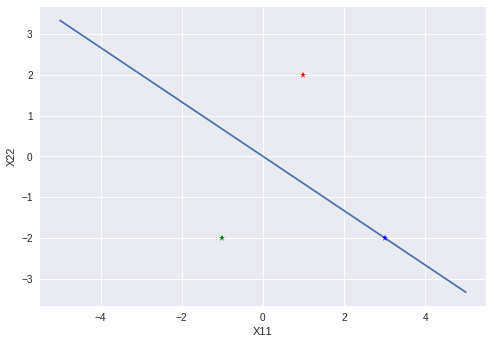

In [0]:
plt.plot(X_1, X_2)
plt.plot([1],[2] ,'r*')
plt.plot([-1], [-2], 'g*')
plt.plot([3], [-2], 'b*')
plt.grid(True)
plt.xlabel('X11')
plt.ylabel('X22')

### Please answer the questions below to complete the experiment:

In [0]:
#@title How was the experiment? { run: "auto", form-width: "500px", display-mode: "form" }
Complexity = "Good, But Not Challenging for me" #@param ["Too Simple, I am wasting time", "Good, But Not Challenging for me", "Good and Challenging me", "Was Tough, but I did it", "Too Difficult for me"]


In [0]:
#@title If it was very easy, what more you would have liked to have been added? If it was very difficult, what would you have liked to have been removed? { run: "auto", display-mode: "form" }
Additional = "nice explanation" #@param {type:"string"}

In [0]:
#@title Can you identify the concepts from the lecture which this experiment covered? { run: "auto", vertical-output: true, display-mode: "form" }
Concepts = "Yes" #@param ["Yes", "No"]

In [0]:
#@title Run this cell to submit your notebook for grading { vertical-output: true }
try:
  if submission_id:
      return_id = submit_notebook()
      if return_id : submission_id =return_id
  else:
      print("Please complete the setup first.")
except NameError:
  print ("Please complete the setup first.")

Your submission is successful.
Ref Id: 358
Date of submission:  06 Mar 2019
Time of submission:  23:08:01
View your submissions: https://iiith-aiml.talentsprint.com/notebook_submissions
For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.
